C:\Users\ACER\AppData\Local\Temp\ipykernel_11216\2562033822.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare'].fillna(df['fare'].mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_11216\2562033822.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

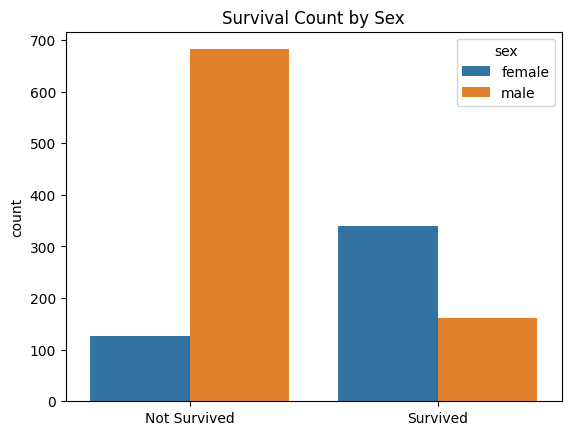

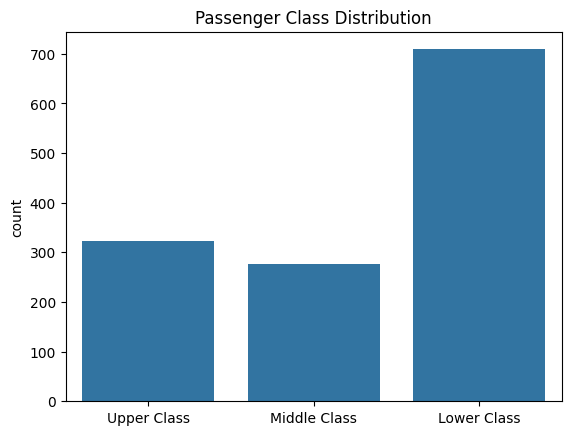

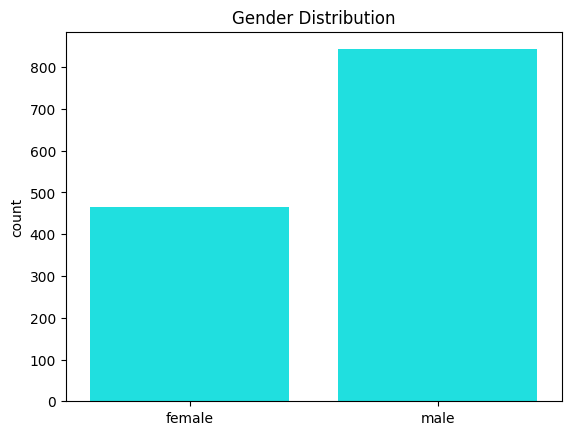

C:\Users\ACER\AppData\Local\Temp\ipykernel_11216\2562033822.py:74: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='age', data=df, bins=40, palette='mako')


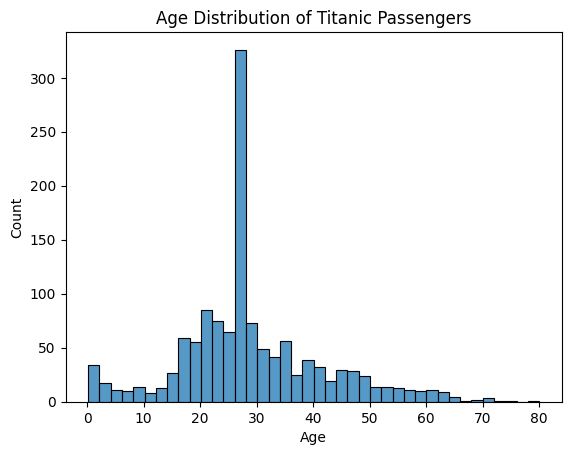

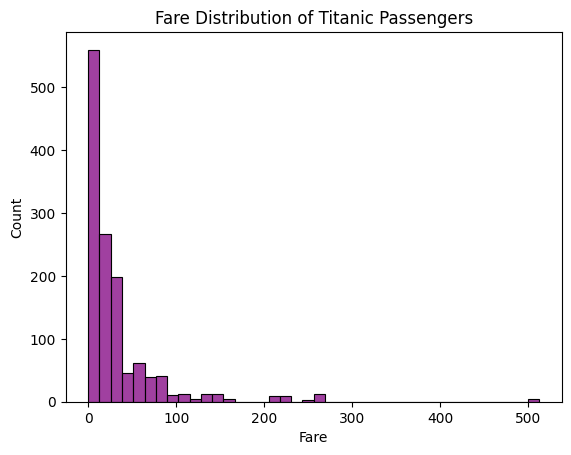

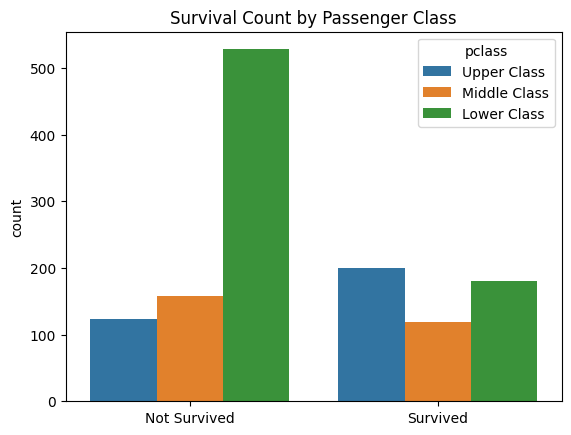

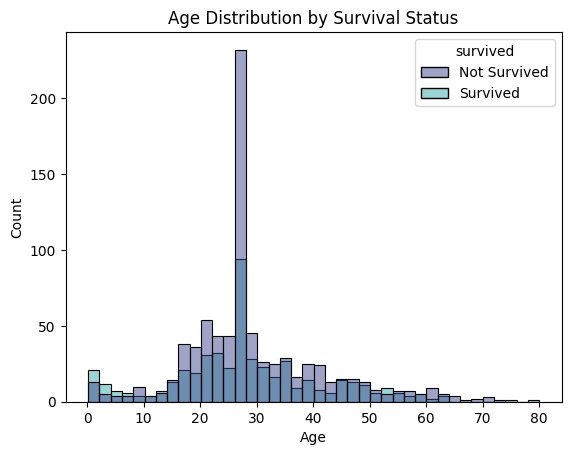

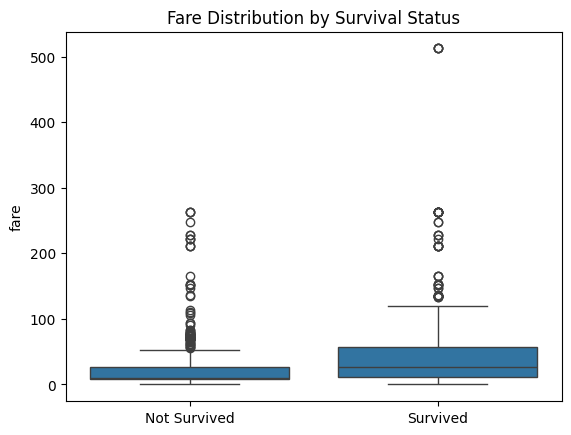

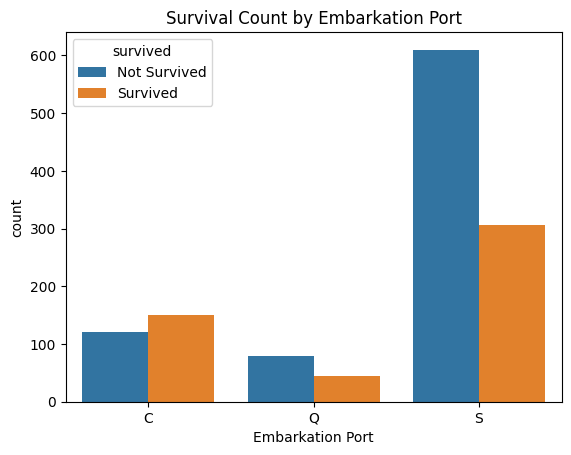

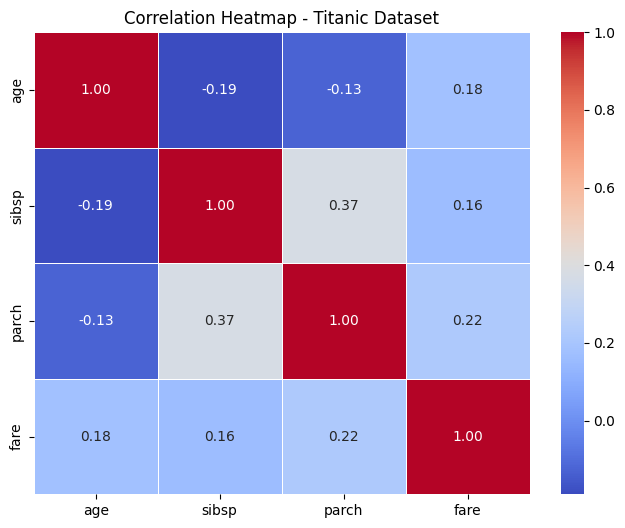

"\n1. Women had a much higher survival rate than men.\n2. 1st class passengers survived at a much higher rate than 3rd class.\n3. Higher fares were positively associated with survival chances.\n4. Younger passengers had slightly higher chances of survival.\n5. Passengers from port 'C' had higher survival rates compared to ports 'S' and 'Q'.\n6. Pclass and fare have a strong negative correlation (-0.55), meaning lower class numbers paid more.\n"

In [42]:


# -------------------------------
# Titanic Dataset - Exploratory Data Analysis
# Libraries: Pandas, Matplotlib, NumPy, Seaborn
# Author: [Your Name]
# -------------------------------

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_excel('titanic3.xls')

# -------------------------------
# 2. Handle Missing Values
# -------------------------------
# Fill missing 'fare' with mean value
df['fare'].fillna(df['fare'].mean(), inplace=True)

# Fill missing 'age' with median value
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' with most common value ('S')
df['embarked'].fillna('S', inplace=True)

# Drop columns with too many missing values or irrelevant for analysis
df.drop(['cabin', 'body', 'home.dest', 'boat'], axis=1, inplace=True)

# -------------------------------
# 3. Data Type Conversion
# -------------------------------
df['pclass'] = df['pclass'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['survived'] = df['survived'].astype('category')

# -------------------------------
# 4. Remove Exact Duplicates
# -------------------------------
# Check true duplicates (all columns match)
true_duplicates = df[df.duplicated(subset=df.columns, keep=False)]
# If duplicates exist and are exact, drop them
df.drop_duplicates(inplace=True)

# -------------------------------
# 5. Univariate & Bivariate Analysis
# -------------------------------

# Survival Count by Sex
df['survived'] = df['survived'].map({0: 'Not Survived', 1: 'Survived'})
sns.countplot(x='survived', data=df, hue='sex')
plt.title('Survival Count by Sex')
plt.xlabel('')
plt.show()

# Passenger Class Distribution
df['pclass'] = df['pclass'].map({1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('')
plt.show()

# Gender Distribution
sns.countplot(x='sex', data=df, color='cyan')
plt.title('Gender Distribution')
plt.xlabel('')
plt.show()

# Age Distribution
sns.histplot(x='age', data=df, bins=40, palette='mako')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.show()

# Fare Distribution
sns.histplot(x='fare', data=df, bins=40, color='purple')
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.show()

# Survival by Passenger Class
sns.countplot(x='survived', data=df, hue='pclass')
plt.title('Survival Count by Passenger Class')
plt.xlabel('')
plt.show()

# Age vs Survival
sns.histplot(x='age', data=df, bins=40, palette='mako', hue='survived')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.show()

# Fare vs Survival (Boxplot)
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('')
plt.show()

# Survival by Embarkation Port
sns.countplot(x='embarked', data=df, hue='survived')
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.show()

# -------------------------------
# 6. Correlation Analysis
# -------------------------------
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()

# -------------------------------
# 7. Key Insights
# -------------------------------
"""
1. Women had a much higher survival rate than men.
2. 1st class passengers survived at a much higher rate than 3rd class.
3. Higher fares were positively associated with survival chances.
4. Younger passengers had slightly higher chances of survival.
5. Passengers from port 'C' had higher survival rates compared to ports 'S' and 'Q'.
6. Pclass and fare have a strong negative correlation (-0.55), meaning lower class numbers paid more.
"""


